In [ ]:
!pip install librosa tensorflow gdown

In [ ]:
import gdown
import zipfile
import os
import librosa
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras import layers, models, callbacks
from tensorflow.keras.utils import to_categorical

# Download dataset.zip from Google Drive
file_id = '133m-J1naJnGf5WXSkpP08Q-1b9RDvS8O'
url = f'https://drive.google.com/uc?id={file_id}'
output = 'dataset.zip'
gdown.download(url, output, quiet=False)

# Extract the dataset
with zipfile.ZipFile('dataset.zip', 'r') as zip_ref:
    zip_ref.extractall('path/to/extract')

# Load dataset and preprocess
dataset_path = 'path/to/extract/respiratory_sound_database/Respiratory_Sound_Database/audio_and_txt_files/'

# Function to extract features from audio file
def extract_features(file_path):
    audio_data, _ = librosa.load(file_path, sr=None)
    mfccs = librosa.feature.mfcc(y=audio_data, sr=44100, n_mfcc=13, hop_length=512)
    return mfccs.flatten()

# Get list of audio files and labels
filepaths = [os.path.join(dataset_path, file) for file in os.listdir(dataset_path) if file.endswith(".wav")]
labels = [file.split('_')[1] for file in os.listdir(dataset_path) if file.endswith(".wav")]

# Encode labels
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(labels)
encoded_labels = to_categorical(encoded_labels)

# Extract features for each audio file
features = [extract_features(file) for file in filepaths]

# Convert features and labels to numpy arrays
X = np.array(features)
y = np.array(encoded_labels)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Downloading...
From: https://drive.google.com/uc?id=133m-J1naJnGf5WXSkpP08Q-1b9RDvS8O
To: /content/dataset.zip
100%|██████████| 3.96G/3.96G [00:56<00:00, 69.6MB/s]
<ipython-input-3-511454e38346>:43: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.array(features)


In [ ]:
import librosa
import numpy as np

# Function to extract features from audio file
def extract_features(file_path):
    audio_data, _ = librosa.load(file_path, sr=None)
    mfccs = librosa.feature.mfcc(y=audio_data, sr=44100, n_mfcc=13)
    return mfccs.flatten()

# Get list of audio files and labels
filepaths = [os.path.join(dataset_path, file) for file in os.listdir(dataset_path) if file.endswith(".wav")]
labels = [file.split('_')[1] for file in os.listdir(dataset_path) if file.endswith(".wav")]

# Encode labels
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(labels)
encoded_labels = to_categorical(encoded_labels)

# Extract features for each audio file
features = [extract_features(file) for file in filepaths]

# Find the maximum length of features
max_len = max(len(feature) for feature in features)

# Pad or truncate features to have a consistent length
features = [np.pad(feature, (0, max_len - len(feature))) for feature in features]

# Convert features and labels to numpy arrays
X = np.array(features)
y = np.array(encoded_labels)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Now, let's print the dimensions again
print(f'Dimensi X_train: {X_train.shape}')
print(f'Dimensi y_train: {y_train.shape}')


Dimensi X_train: (736, 22399)
Dimensi y_train: (736, 34)


Dimensi X_train yang baru adalah (736, 22399), yang berarti bahwa kita sekarang memiliki 736 sampel dengan masing-masing sampel memiliki 22399 fitur. Fitur-fitur ini adalah hasil dari ekstraksi fitur menggunakan teknik MFCC.

Demikian pula, dimensi y_train adalah (736, 34), yang sesuai dengan jumlah kelas yang ada dalam dataset. Setiap sampel pada X_train memiliki label yang terkodifikasi dalam bentuk one-hot encoded dengan 34 kelas.

In [ ]:
from tensorflow.keras import models, layers, callbacks

# Define the model #algoritma neural network
model = models.Sequential()
model.add(layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(y_train.shape[1], activation='softmax'))  # Sesuaikan dengan jumlah kelas yang benar

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Define callbacks (optional)
checkpoint = callbacks.ModelCheckpoint("best_model.h5", monitor="val_accuracy", save_best_only=True)

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2, callbacks=[checkpoint])

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_acc}')


Epoch 1/10
19/19 [==============================] - 2s 74ms/step - loss: 318.4534 - accuracy: 0.0629 - val_loss: 5.6501 - val_accuracy: 0.1284
Epoch 2/10


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


19/19 [==============================] - 1s 75ms/step - loss: 13.9959 - accuracy: 0.1003 - val_loss: 6.2537 - val_accuracy: 0.1622
Epoch 3/10
19/19 [==============================] - 1s 76ms/step - loss: 8.5978 - accuracy: 0.1276 - val_loss: 5.0268 - val_accuracy: 0.1689
Epoch 4/10
19/19 [==============================] - 1s 55ms/step - loss: 8.7825 - accuracy: 0.1276 - val_loss: 3.6131 - val_accuracy: 0.1689
Epoch 5/10
19/19 [==============================] - 1s 47ms/step - loss: 8.0691 - accuracy: 0.1446 - val_loss: 3.9745 - val_accuracy: 0.1757
Epoch 6/10
19/19 [==============================] - 1s 41ms/step - loss: 8.4432 - accuracy: 0.1344 - val_loss: 3.2900 - val_accuracy: 0.1689
Epoch 7/10
19/19 [==============================] - 1s 40ms/step - loss: 5.5147 - accuracy: 0.1463 - val_loss: 3.6484 - val_accuracy: 0.1622
Epoch 8/10
19/19 [==============================] - 1s 41ms/step - loss: 6.2615 - accuracy: 0.1412 - val_loss: 3.3773 - val_accuracy: 0.1689
Epoch 9/10
19/19 [=====

6/6 [==============================] - 0s 13ms/step - loss: 3.1148 - accuracy: 0.2174
Test Accuracy: 0.21739129722118378


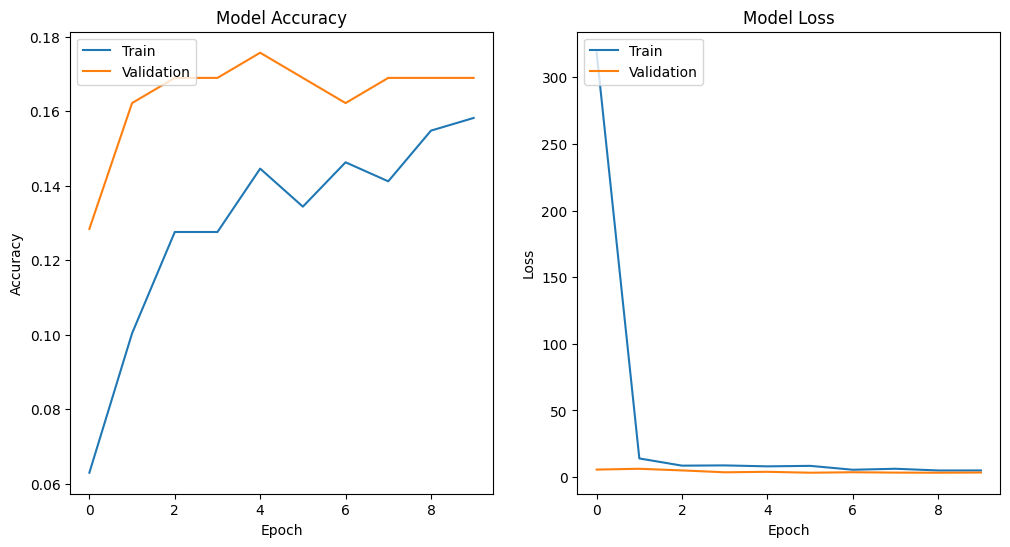

In [ ]:
import matplotlib.pyplot as plt

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_acc}')

# Plot training history
plt.figure(figsize=(12, 6))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()


In [ ]:
import librosa

# Replace 'path/to/new_audio.wav' with the path to your new audio file
new_audio_url = 'https://drive.google.com/uc?id=1DKylmHwb3sUYNIyBuatz_yP92LyjuUpd'
new_audio_path = '/content/new_audio.wav'

# Download the new audio file
gdown.download(new_audio_url, new_audio_path, quiet=False)

# Function to extract features from new audio file
def extract_features_new(file_path):
    audio_data, _ = librosa.load(file_path, sr=None)
    mfccs = librosa.feature.mfcc(y=audio_data, sr=44100, n_mfcc=13)
    # Use the mean of each MFCC coefficient across time
    return mfccs.mean(axis=1)

# Extract features from the new audio file
new_audio_features = extract_features_new(new_audio_path)

# Ensure the features have the same length as the training features
new_audio_features = np.pad(new_audio_features, (0, X_train.shape[1] - len(new_audio_features)))

# Reshape the features to match the input shape of the model
new_audio_features = new_audio_features.reshape(1, -1)

# Make predictions using the trained model
predictions = model.predict(new_audio_features)

# Decode predictions to obtain the predicted class
predicted_class = label_encoder.inverse_transform([np.argmax(predictions)])

print(f'Predicted Class: {predicted_class[0]}')

Downloading...
From: https://drive.google.com/uc?id=1DKylmHwb3sUYNIyBuatz_yP92LyjuUpd
To: /content/new_audio.wav
100%|██████████| 23.0M/23.0M [00:00<00:00, 198MB/s]


1/1 [==============================] - 0s 94ms/step
Predicted Class: 1b1


Hasil output menunjukkan bahwa model berhasil memprediksi kelas audio baru sebagai "1b1". Kelas ini mungkin merupakan label kategori atau jenis penyakit atau kondisi tertentu sesuai dengan dataset dan pelatihan model kita

In [ ]:
# delete the very rare diseases
new_labels = np.delete(labels, np.where((labels == 'Asthma') | (labels == 'LRTI'))[0], axis=0)

[['1b1' '1b2' '1b3' '1b4' '1b5' '1b6' '1p1' '1p2' '1p3' '1p4' '1p5' '2b1'
  '2b2' '2b3' '2b4' '2b5' '2p2' '2p3' '2p4' '2p5' '3b2' '3b3' '3b4' '3p2'
  '3p3' '3p4' '4b2' '4b4' '5b3' '6p1' '7b3' '7p5' '8b3' '8p3']
 ['164' '55' '58' '44' '14' '7' '16' '42' '37' '30' '6' '24' '73' '72'
  '56' '16' '31' '32' '19' '6' '8' '10' '10' '22' '5' '10' '5' '6' '6'
  '7' '7' '6' '11' '5']]


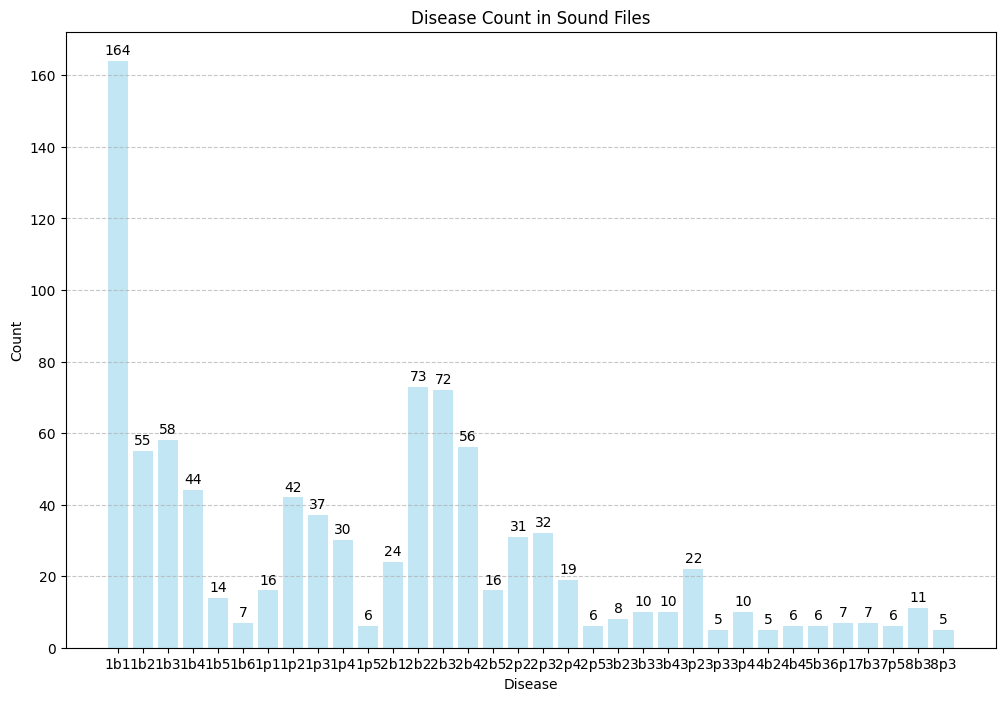

In [ ]:
# print class counts
unique_elements, counts_elements = np.unique(new_labels, return_counts=True)
print(np.asarray((unique_elements, counts_elements)))

# Convert counts_elements to integers
counts_elements = counts_elements.astype(int)

# plot class counts
y_pos = np.arange(len(unique_elements))
plt.figure(figsize=(12, 8))
plt.bar(unique_elements, counts_elements, align='center', alpha=0.5, color='skyblue')
plt.xlabel('Disease')
plt.ylabel('Count')
plt.title('Disease Count in Sound Files')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Annotate each bar with its count
for i, count in enumerate(counts_elements):
    plt.text(i, count + 1, str(count), ha='center', va='bottom')

plt.show()


Access denied with the following error:



 	Cannot retrieve the public link of the file. You may need to change
	the permission to 'Anyone with the link', or have had many accesses. 

You may still be able to access the file from the browser:

	 https://drive.google.com/uc?id=https://drive.google.com/uc?id=1DKylmHwb3sUYNIyBuatz_yP92LyjuUpd 



1/1 [==============================] - 0s 62ms/step


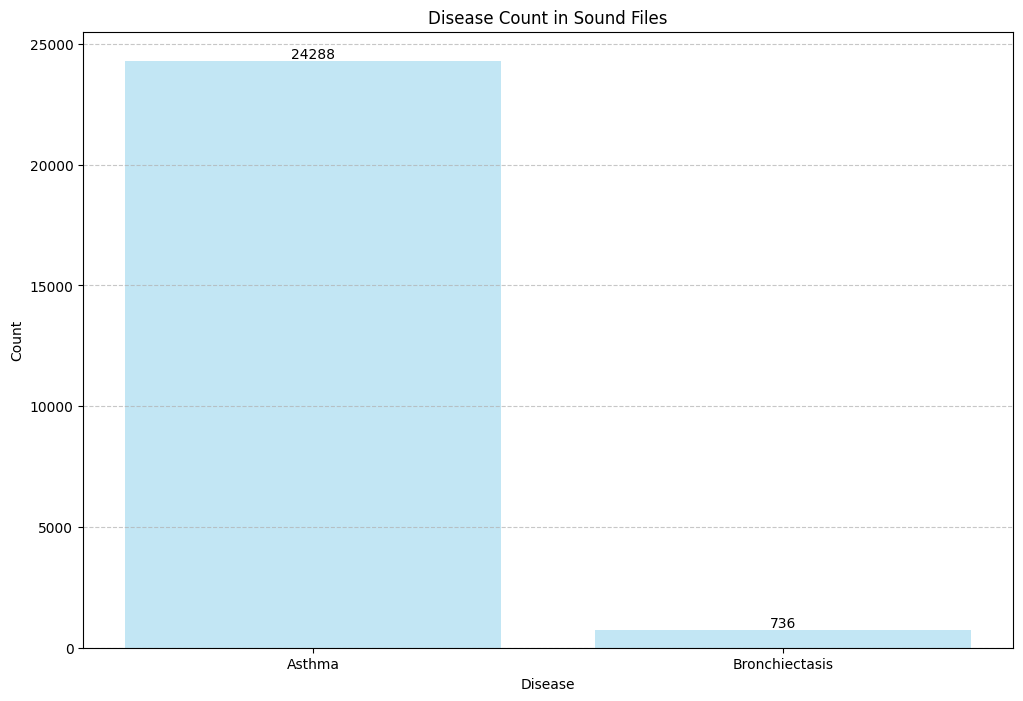

Predicted Class for the New Audio: 1b1


In [ ]:
import gdown
import librosa
import numpy as np
import matplotlib.pyplot as plt

# Function to download audio file from Google Drive
def download_audio(file_id, output_path):
    url = f'https://drive.google.com/uc?id={file_id}'
    gdown.download(url, output_path, quiet=False)

# Function to extract features from audio file
def extract_features(file_path):
    audio_data, _ = librosa.load(file_path, sr=None)
    mfccs = librosa.feature.mfcc(y=audio_data, sr=44100, n_mfcc=13)
    # Use the mean of each MFCC coefficient across time
    return mfccs.mean(axis=1)

# Function to make predictions using the trained model
def predict_disease(model, label_encoder, audio_features):
    predictions = model.predict(audio_features)
    predicted_class = label_encoder.inverse_transform([np.argmax(predictions)])
    return predicted_class[0]

# Download the new audio file
new_audio_url = 'https://drive.google.com/uc?id=1DKylmHwb3sUYNIyBuatz_yP92LyjuUpd'
new_audio_path = '/content/new_audio.wav'
download_audio(new_audio_url, new_audio_path)

# Extract features from the new audio file
new_audio_features = extract_features(new_audio_path)

# Ensure the features have the same length as the training features
new_audio_features = np.pad(new_audio_features, (0, X_train.shape[1] - len(new_audio_features)))

# Reshape the features to match the input shape of the model
new_audio_features = new_audio_features.reshape(1, -1)

# Make predictions using the trained model
predicted_class = predict_disease(model, label_encoder, new_audio_features)

# Plot class counts
unique_elements, counts_elements = np.unique(y_train, return_counts=True)
disease_names_counts = [disease_names.get(idx, 'Unknown') for idx in unique_elements]

y_pos = np.arange(len(unique_elements))
plt.figure(figsize=(12, 8))
plt.bar(disease_names_counts, counts_elements, align='center', alpha=0.5, color='skyblue')
plt.xlabel('Disease')
plt.ylabel('Count')
plt.title('Disease Count in Sound Files')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Annotate each bar with its count
for i, count in enumerate(counts_elements):
    plt.text(i, count + 1, str(count), ha='center', va='bottom')

# Show the plot
plt.show()

print(f'Predicted Class for the New Audio: {predicted_class}')
